[[0.00000000e+00 2.00000000e-01 4.00000000e-01 5.00000000e-01
  5.25000000e-01 5.50000000e-01 6.00000000e-01 6.50000000e-01]
 [3.38164298e-01 3.48276413e-01 3.77053535e-01 3.95782802e-01
  4.00588610e-01 4.08166571e-01 4.47980467e-01 5.25545679e-01]
 [2.11471231e-03 1.19620942e-03 5.72293982e-04 1.04661418e-03
  1.26658097e-03 2.21265170e-03 5.47353400e-03 5.85147577e-03]]
8 8
8 8 8


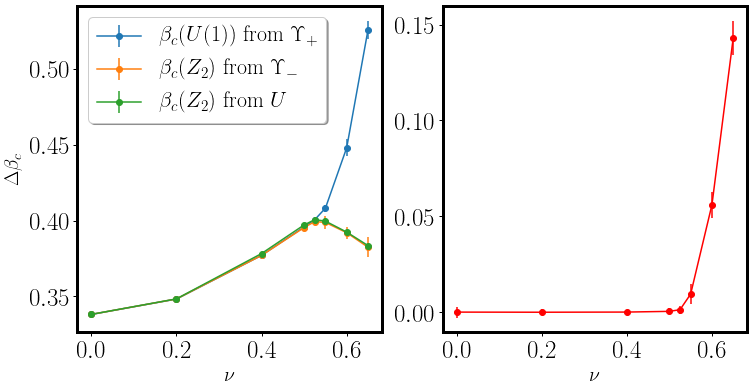

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import sys
import os
import math
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf
import scipy.integrate as integrate
import random
from scipy.optimize import fsolve
from scipy.optimize import bisect
from scipy.optimize import curve_fit


plt.rc('text',usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{bm}')
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.serif'] = 'Computer Modern'
plt.rcParams['axes.linewidth']  = 3.0
plt.rcParams['axes.labelsize']  = 20
plt.rcParams.update({'font.size': 22})
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25
plt.rcParams['xtick.major.size'] = 4
plt.rcParams['ytick.major.size'] = 4
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['ytick.minor.size'] = 3
plt.rcParams['legend.fontsize']  = 22
plt.rcParams['legend.frameon']  = True
plt.rcParams["legend.fancybox"] = True
plt.rcParams["legend.shadow"] = True
plt.rcParams["legend.framealpha"] = 1
plt.rcParams["axes.facecolor"] = 'white'
plt.rcParams["axes.edgecolor"] = 'black'

plt.rcParams['figure.figsize'] = 8, 8

plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['xtick.minor.width'] = 0
plt.rcParams['ytick.minor.width'] = 0
bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)

eta2=1

folder_fig=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/Figures_new")

fig2, ax2 = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(12,6))
 
ax2[0].set_xlabel(r"$\nu$")
ax2[1].set_xlabel(r"$\nu$")

ax2[0].set_ylabel(r"$\beta_c$")
ax2[0].set_ylabel(r"$\Delta \beta_c$")


dataU= np.loadtxt("%s/betac_U1_eta2%s.txt" %(folder_fig, eta2))
print(dataU)
nu=dataU[0]
betac_U=dataU[1]
err_betac_U=dataU[2]
print(len(nu), len(betac_U))
dataZ= np.loadtxt("%s/betac_Z2_eta2%s.txt" %(folder_fig, eta2))
nu_Z=dataZ[0]
betac_Z=dataZ[1]
err_betac_Z=dataZ[2]

dataZ_B= np.loadtxt("%s/betac_Binder_Z2_eta2%s.txt" %(folder_fig, eta2))
nu_ZB=dataZ_B[0]
betac_ZB=dataZ_B[1]
err_betac_ZB=dataZ_B[2]

print(len(betac_U), len(betac_Z), len(betac_ZB))
diff_betac= betac_U - betac_Z
err_diff_betac= np.sqrt(err_betac_U*err_betac_U + err_betac_Z*err_betac_Z)

ax2[0].errorbar(nu,betac_U, yerr= err_betac_U, fmt="o-", label=r"$\beta_c(U(1))$ from $\Upsilon_+$")
ax2[0].errorbar(nu_Z,betac_Z, yerr= err_betac_Z, fmt="o-", label=r"$\beta_c(Z_2)$ from $\Upsilon_-$")
ax2[0].errorbar(nu_ZB,betac_ZB, yerr= err_betac_ZB, fmt="o-", label=r"$\beta_c(Z_2)$ from $U$")
ax2[1].errorbar(nu,diff_betac, yerr= err_diff_betac, fmt="o-", c="red")

ax2[0].legend(loc='best')
fig2.savefig("%s/Critical_Points_eta2%s.png" %(folder_fig, eta2) )
